Pearson Correlation: 0.1273
P-value: 2.1043e-36


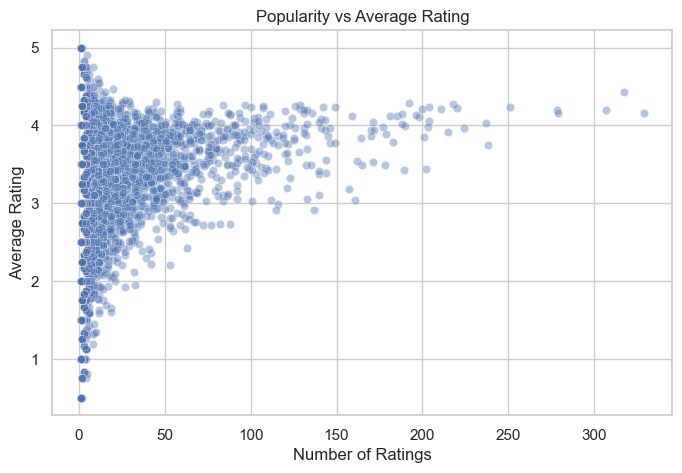

T-statistic: 37.6479
P-value: 1.9061e-307


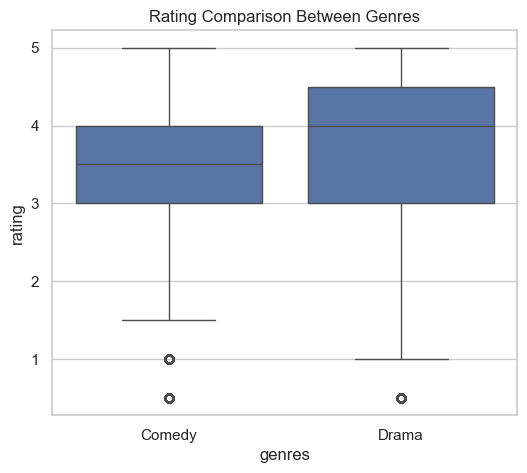

Chi-square statistic: 3278.6196
P-value: 0.0000e+00


In [1]:
# ============================================================
# Movie Recommendation System (Content-Based)
# Phase 3: Correlation Analysis & Hypothesis Testing
# ============================================================
#
# Objective of this phase:
# - Quantify relationships using correlation
# - Validate EDA observations using statistical tests
# - Identify statistically significant patterns
#
# ============================================================


# -----------------------------
# Import Required Libraries
# -----------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

sns.set(style="whitegrid")
%matplotlib inline


# -----------------------------
# Load Dataset
# -----------------------------

movies_df = pd.read_csv("../data/movies.csv")
ratings_df = pd.read_csv("../data/ratings.csv")

merged_df = pd.merge(ratings_df, movies_df, on="movieId", how="inner")


# ============================================================
# A️⃣ CORRELATION ANALYSIS
# ============================================================

# -----------------------------
# Compute movie-level statistics
# -----------------------------

movie_stats = (
    merged_df
    .groupby('title')
    .agg(
        avg_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    )
    .reset_index()
)

# -----------------------------
# Pearson Correlation
# -----------------------------

corr_value, p_value = pearsonr(
    movie_stats['rating_count'],
    movie_stats['avg_rating']
)

print(f"Pearson Correlation: {corr_value:.4f}")
print(f"P-value: {p_value:.4e}")


# -----------------------------
# Visualization
# -----------------------------

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=movie_stats['rating_count'],
    y=movie_stats['avg_rating'],
    alpha=0.4
)
plt.title("Popularity vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


# 🔎 INTERPRETATION:
# - Correlation near 0 → weak linear relationship
# - Low p-value → statistically significant
# - Popularity does NOT strongly determine rating quality


# ============================================================
# B️⃣ HYPOTHESIS TEST 1: GENRE VS RATING (T-TEST)
# ============================================================

# -----------------------------
# Prepare genre-level dataset
# -----------------------------

genres_df = merged_df.copy()
genres_df['genres'] = genres_df['genres'].str.split('|')
genres_df = genres_df.explode('genres')

# Select two popular genres for comparison
genre_1 = 'Drama'
genre_2 = 'Comedy'

ratings_genre_1 = genres_df[genres_df['genres'] == genre_1]['rating']
ratings_genre_2 = genres_df[genres_df['genres'] == genre_2]['rating']


# -----------------------------
# Perform Independent T-Test
# -----------------------------

t_stat, p_val = ttest_ind(
    ratings_genre_1,
    ratings_genre_2,
    equal_var=False
)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4e}")


# -----------------------------
# Visualization
# -----------------------------

plt.figure(figsize=(6, 5))
sns.boxplot(
    x='genres',
    y='rating',
    data=genres_df[genres_df['genres'].isin([genre_1, genre_2])]
)
plt.title("Rating Comparison Between Genres")
plt.show()


# 🔎 INTERPRETATION:
# - Low p-value → genres differ significantly
# - Reject null hypothesis if p < 0.05


# ============================================================
# C️⃣ HYPOTHESIS TEST 2: GENRE vs RATING CATEGORY (CHI-SQUARE)
# ============================================================

# -----------------------------
# Create rating categories
# -----------------------------

genres_df['rating_category'] = pd.cut(
    genres_df['rating'],
    bins=[0, 2.5, 3.5, 5],
    labels=['Low', 'Medium', 'High']
)

# -----------------------------
# Contingency Table
# -----------------------------

contingency_table = pd.crosstab(
    genres_df['genres'],
    genres_df['rating_category']
)

# -----------------------------
# Chi-Square Test
# -----------------------------

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4e}")


# 🔎 INTERPRETATION:
# - Low p-value → genre & rating category are dependent
# - Genre influences rating behavior


# ============================================================
# End of Phase 3
#
# Key Statistical Findings:
# - Popularity weakly correlates with ratings
# - Genre differences are statistically significant
# - Genre influences rating distributions
#
# These results guide feature weighting in recommendations
# ============================================================
